In [ ]:
from google.colab import files
files.upload() #upload kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sizlingdhairya1/alzheimers-4
!unzip alzheimers-4.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/NonDemented/31 (10).jpg  
  inflating: Datasets/NonDemented/31 (100).jpg  
  inflating: Datasets/NonDemented/31 (11).jpg  
  inflating: Datasets/NonDemented/31 (12).jpg  
  inflating: Datasets/NonDemented/31 (13).jpg  
  inflating: Datasets/NonDemented/31 (14).jpg  
  inflating: Datasets/NonDemented/31 (15).jpg  
  inflating: Datasets/NonDemented/31 (16).jpg  
  inflating: Datasets/NonDemented/31 (17).jpg  
  inflating: Datasets/NonDemented/31 (18).jpg  
  inflating: Datasets/NonDemented/31 (19).jpg  
  inflating: Datasets/NonDemented/31 (2).jpg  
  inflating: Datasets/NonDemented/31 (20).jpg  
  inflating: Datasets/NonDemented/31 (21).jpg  
  inflating: Datasets/NonDemented/31 (22).jpg  
  inflating: Datasets/NonDemented/31 (23).jpg  
  inflating: Datasets/NonDemented/31 (24).jpg  
  inflating: Datasets/NonDemented/31 (25).jpg  
  inflating: Datasets/NonDemented/31 (26).jpg  
  inflating: Datasets/NonDemented/31 

In [3]:
import keras
print(keras.__version__)

2.12.0


Text(0.5, 1.0, 'VeryMildDemented=2240')

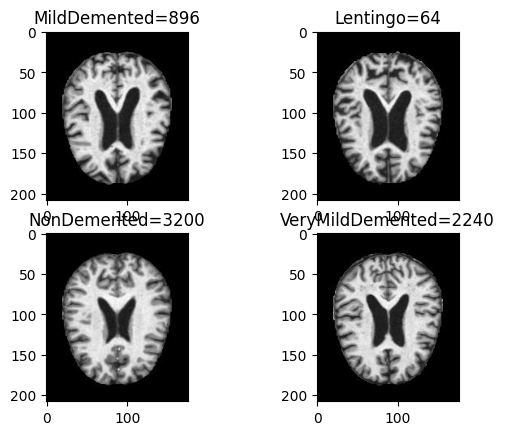

In [ ]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import shutil
SIZE=128
path='Datasets/'
clss=len(os.listdir(path))
k=1
data=[]
x=os.listdir(path)
labels=[]
aa=-1
k=-1
for filename in x:
    y=os.listdir(path+filename+'/')
    aa=aa+1
    k=k+1
    for file in y:
        img=cv2.imread(path+filename+'/'+file)
        img = cv2.resize(img, (SIZE, SIZE))
        data.append(img)
        labels.append(k)

data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test1 = train_test_split(data, labels, test_size=0.20,random_state = 50)

#Reshape input data
X_train = X_train.reshape(X_train.shape[0], SIZE, SIZE, 3)
X_test = X_test.reshape(X_test.shape[0], SIZE, SIZE, 3)

#Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#One hot encoding of outputs
y_train = np_utils.to_categorical(y_train, clss)
y_test = np_utils.to_categorical(y_test1, clss)
num_classes = y_test.shape[1]
import cv2
import os
import matplotlib.pyplot as plt
img1=cv2.imread("/content/Datasets/MildDemented/26 (19).jpg")
img2=cv2.imread("/content/Datasets/ModerateDemented/27 (2).jpg")
img3=cv2.imread("/content/Datasets/NonDemented/26 (100).jpg")
img4=cv2.imread("/content/Datasets/VeryMildDemented/26 (44).jpg")
plt.figure()
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("MildDemented="+str(len(os.listdir("/content/Datasets/MildDemented/"))))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Lentingo="+str(len(os.listdir("/content/Datasets/ModerateDemented/"))))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("NonDemented="+str(len(os.listdir("/content/Datasets/NonDemented/"))))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("VeryMildDemented="+str(len(os.listdir("/content/Datasets/VeryMildDemented/"))))

In [ ]:
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (2,2), input_shape=(SIZE,SIZE,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(clss,activation="softmax"))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0

In [ ]:
#Fit the model
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20,batch_size=32,verbose=1)

Epoch 1/20
160/160 [==============================] - 20s 34ms/step - loss: 1.0617 - accuracy: 0.5039 - val_loss: 1.0714 - val_accuracy: 0.5453
Epoch 2/20
160/160 [==============================] - 5s 29ms/step - loss: 0.9006 - accuracy: 0.5760 - val_loss: 0.8684 - val_accuracy: 0.6023
Epoch 3/20
160/160 [==============================] - 4s 28ms/step - loss: 0.7740 - accuracy: 0.6508 - val_loss: 0.7062 - val_accuracy: 0.6984
Epoch 4/20
160/160 [==============================] - 5s 30ms/step - loss: 0.6668 - accuracy: 0.7064 - val_loss: 0.6018 - val_accuracy: 0.7406
Epoch 5/20
160/160 [==============================] - 4s 28ms/step - loss: 0.5608 - accuracy: 0.7516 - val_loss: 0.5443 - val_accuracy: 0.7688
Epoch 6/20
160/160 [==============================] - 5s 28ms/step - loss: 0.4587 - accuracy: 0.8080 - val_loss: 0.4071 - val_accuracy: 0.8477
Epoch 7/20
160/160 [==============================] - 5s 29ms/step - loss: 0.3742 - accuracy: 0.8578 - val_loss: 0.3086 - val_accuracy: 0.886

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test1, y_pred))
print('Classification Report')
print(classification_report(y_test1, y_pred,target_names=os.listdir(path)))

40/40 [==============================] - 0s 6ms/step
Confusion Matrix
[[437   3   0   0]
 [  1 634   0   0]
 [  2   5 185   0]
 [  0   0   0  13]]
Classification Report
                  precision    recall  f1-score   support

VeryMildDemented       0.99      0.99      0.99       440
     NonDemented       0.99      1.00      0.99       635
    MildDemented       1.00      0.96      0.98       192
ModerateDemented       1.00      1.00      1.00        13

        accuracy                           0.99      1280
       macro avg       1.00      0.99      0.99      1280
    weighted avg       0.99      0.99      0.99      1280



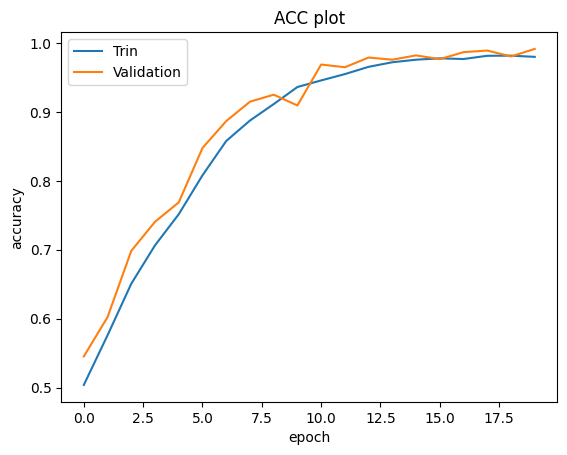

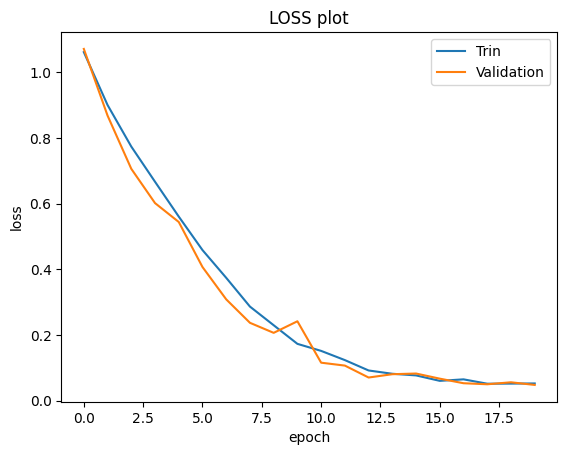

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy result
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACC plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Trin','Validation'])
plt.show()
# Plot loss result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Trin','Validation'])
plt.show()

1/1 [==============================] - 0s 128ms/step


Text(0.5, 1.0, 'Prediction: ModerateDemented')

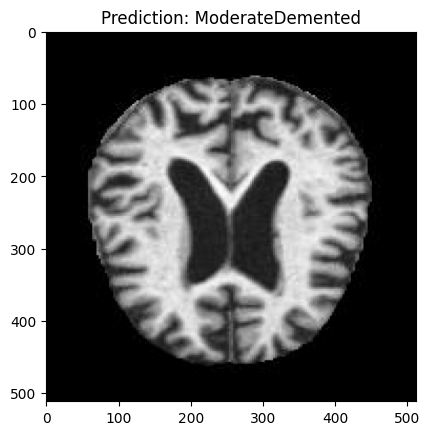

In [ ]:
import  numpy as np
import cv2
path1="/content/Datasets/ModerateDemented/28 (2).jpg"
categories = os.listdir(path)
nimage = cv2.imread(path1)
image = cv2.resize(nimage,(SIZE,SIZE))
image = image/255.0
prediction = model.predict(np.array(image).reshape(-1,SIZE,SIZE,3))
pclass = np.argmax(prediction)
img=cv2.imread(path1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(512,512), interpolation = cv2.INTER_AREA)
import matplotlib.pyplot as plt
plt.imshow(img)
pValue = "Prediction: {0}".format(categories[int(pclass)])
plt.title(pValue)